![resim](25.jpg)

* Küçükten başlayıp en yakınları bula bula tek bir clustera çıktık.
* en yakın noktalar merkeze göre mi yoksa en yakın nıktassına göre mi köşesine göre mi ya da merkezine göre mi ona bakıyoruz
* 

# Dendogram
* Her bir HC'nin stepini gösteren şeydir.
![resim](26.jpg)

* bir threshold koyduk 3'ten yukarı olmasın gibi 2 tane cluster oldu
* threshold 2 olsa 3 tane clusterım var derim
* threshold 1 için 5 tane clusterım var demektir.
* Benzerlik seviyem 1 den büyük olmasın gibi de yorumlayabilirim.

![resim](27.jpg)

In [6]:
# burda da yatay kesmeyen distanceları bulurum . en büyük distancetan keserim. 2 tane clusterım var deriz. bu thresholdu kestiği noktaları alırım.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# %% create dataset

# class1
x1 = np.random.normal(25,5,100)
y1 = np.random.normal(25,5,100)

# class2
x2 = np.random.normal(55,5,100)
y2 = np.random.normal(60,5,100)

# class3
x3 = np.random.normal(55,5,100)
y3 = np.random.normal(15,5,100)

x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

dictionary = {"x":x,"y":y}

In [9]:
data = pd.DataFrame(dictionary)

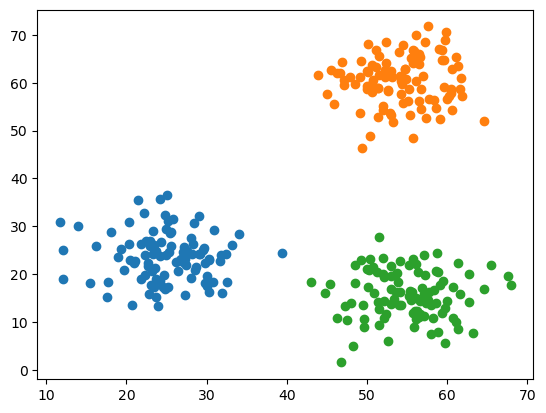

In [10]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

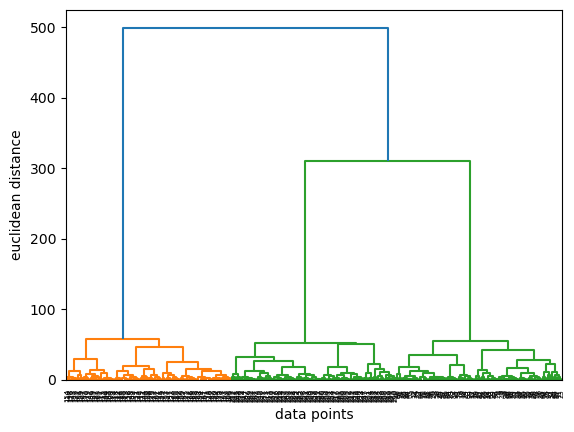

In [11]:
# %% dendogram
from scipy.cluster.hierarchy import linkage, dendrogram
# linkage dendogram çizdirmek için kullanılacak olan algoritma
merg = linkage(data,method="ward") # ward . cluster içindeki yayılımlları minimilize et --> k meansteki gibi
dendrogram(merg,leaf_rotation = 90) # alttakişeyleri yan gösterir
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [16]:
# %% HC
from sklearn.cluster import AgglomerativeClustering # tümevarım şeklinde tek bir clustera ulaşma yöntemine debir.

hiyerartical_cluster = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
cluster = hiyerartical_cluster.fit_predict(data) # modelimi oluştur ve datama göre predict yap diyoruz.

data["label"] = cluster

In [20]:
data.head()

,x,y,label
0,28.701415,21.522026,1
1,22.901128,26.906399,1
2,30.793013,18.337345,1
3,27.595969,24.807818,1
4,24.179348,23.872355,1


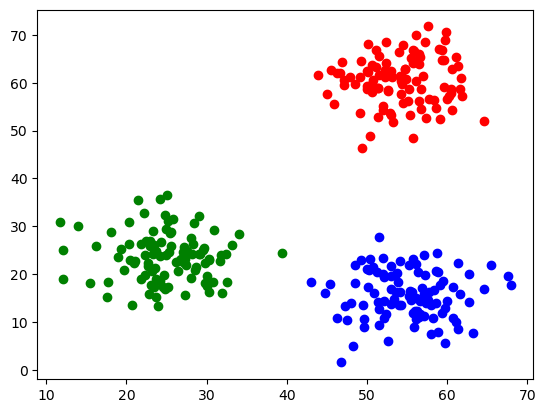

In [22]:
plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.show()